# Examining Accuracy-Consistency Trade-offs
- Aims to explore how consistency impacts accuracy for individual users.
- We aim to identify whether users sacrifice accuracy to maintain consistency or vice versa.

In [1]:
import gdown
folder_id = "1G7YDTrD_UNCUFiOs5ed4JV1QtRXaAEU0"
output = "datasets"
gdown.download_folder(f"https://drive.google.com/drive/folders/{folder_id}", output=output, quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 1DAPRaVIVUmJME2LHfNfwwveB4mk5VOPx Subject_A_Results.csv
Processing file 1hf-mQ-rTuKlFlkMd8Nld77s8HbMs01NV Subject_B_Results.csv
Processing file 1zOQNeWfoew5LoT2AbSHqXlpRVYfiNKYg Subject_C_Results.csv
Processing file 18gvXYZ15sfvGkPIJTYb3FLwwTAdvesCr Subject_D_Results.csv
Processing file 19R_ckXXDHpanEX04UqNfwlA90jFxPaDR Subject_E_Results.csv
Processing file 1o2fkODEhX_4ObhHX1ghVAgk390BvCYoD Subject_F_Results.csv
Processing file 1tSKEy03Tcjiw9iJjpxH03plDjZRsgZZh Subject_G_Results.csv
Processing file 18NMwG0OHknGMDfFczZ5xntwFGEee_rcj Subject_H_Results.csv
Processing file 16uSR_2cqPTtCyUklqqttsNPZvrzads-k Subject_I_Results.csv
Processing file 1BnJ8m-YIVU_D7rXj46F4oLn1PMeXrOP1 Subject_J_Results.csv
Processing file 1RjLMAKuzuYk4E32wY6MvqP21WnmuKkVn Subject_K_Results.csv
Processing file 16PBRPMRWzpVjBJxs78zK5iaQ-Dc_vsjF Subject_L_Results.csv
Processing file 1JRc1mz1ODZeURfQGaMXdLkv9F73vKZ1z Subject_M_Results.csv
Processing file 1Aib17o9nXQAYNWiDwo-E0wd_NBvnOl9U Subject_N_Resu

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1DAPRaVIVUmJME2LHfNfwwveB4mk5VOPx
To: /content/datasets/Subject_A_Results.csv
100%|██████████| 67.6k/67.6k [00:00<00:00, 57.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hf-mQ-rTuKlFlkMd8Nld77s8HbMs01NV
To: /content/datasets/Subject_B_Results.csv
100%|██████████| 152k/152k [00:00<00:00, 29.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zOQNeWfoew5LoT2AbSHqXlpRVYfiNKYg
To: /content/datasets/Subject_C_Results.csv
100%|██████████| 147k/147k [00:00<00:00, 48.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=18gvXYZ15sfvGkPIJTYb3FLwwTAdvesCr
To: /content/datasets/Subject_D_Results.csv
100%|██████████| 155k/155k [00:00<00:00, 19.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=19R_ckXXDHpanEX04UqNfwlA90jFxPaDR
To: /content/datasets/Subject_E_Results.csv
100%|██████████| 157k/157k [00:00<00:00

['datasets/Subject_A_Results.csv',
 'datasets/Subject_B_Results.csv',
 'datasets/Subject_C_Results.csv',
 'datasets/Subject_D_Results.csv',
 'datasets/Subject_E_Results.csv',
 'datasets/Subject_F_Results.csv',
 'datasets/Subject_G_Results.csv',
 'datasets/Subject_H_Results.csv',
 'datasets/Subject_I_Results.csv',
 'datasets/Subject_J_Results.csv',
 'datasets/Subject_K_Results.csv',
 'datasets/Subject_L_Results.csv',
 'datasets/Subject_M_Results.csv',
 'datasets/Subject_N_Results.csv',
 'datasets/Subject_O_Results.csv',
 'datasets/Subject_P_Results.csv',
 'datasets/Subject_Q_Results.csv',
 'datasets/Subject_R_Results.csv',
 'datasets/Subject_S_Results.csv',
 'datasets/Subject_T_Results.csv',
 'datasets/Subject_U_Results.csv',
 'datasets/Subject_V_Results.csv']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

folder_path = "datasets"
csv_files = glob.glob(f"{folder_path}/*.csv")
combined_data = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

Pearson Correlation: 0.3192 (p-value: 0.0000e+00)
Spearman Correlation: 0.3341 (p-value: 0.0000e+00)


<ipython-input-3-995704b0c90f>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


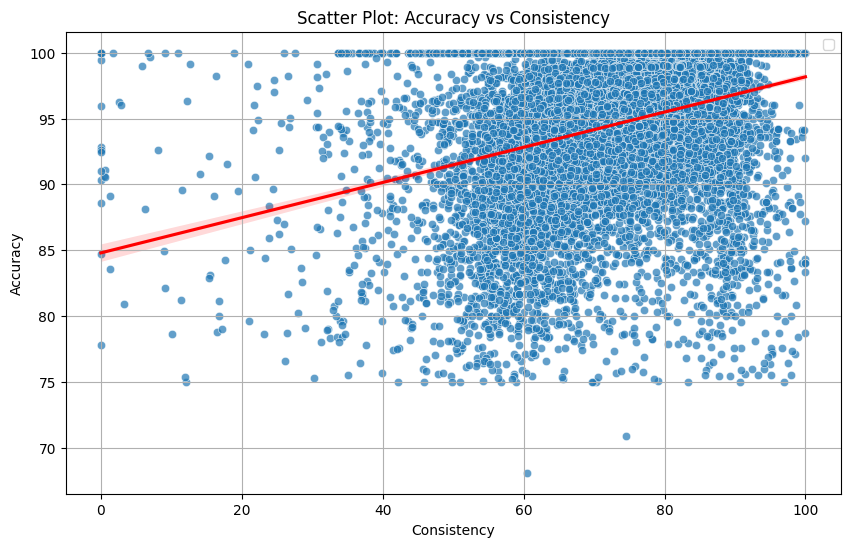

Summary Statistics:
                 acc   consistency
count  15003.000000  15003.000000
mean      94.514574     72.677517
std        5.166798     12.333237
min       68.100000      0.000000
25%       92.050000     65.475000
50%       95.630000     73.700000
75%       98.630000     81.225000
max      100.000000    100.000000


In [3]:
from scipy.stats import pearsonr, spearmanr

data = combined_data

relevant_columns = ['wpm', 'acc', 'consistency']
filtered_data = data[relevant_columns].dropna()

pearson_corr, pearson_p = pearsonr(filtered_data['acc'], filtered_data['consistency'])
spearman_corr, spearman_p = spearmanr(filtered_data['acc'], filtered_data['consistency'])
print(f"Pearson Correlation: {pearson_corr:.4f} (p-value: {pearson_p:.4e})")
print(f"Spearman Correlation: {spearman_corr:.4f} (p-value: {spearman_p:.4e})")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='consistency', y='acc', data=filtered_data, alpha=0.7)
sns.regplot(x='consistency', y='acc', data=filtered_data, scatter=False, color='red', line_kws={'label': 'Trend Line'})
plt.title("Scatter Plot: Accuracy vs Consistency")
plt.xlabel("Consistency")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

print("Summary Statistics:\n", filtered_data[['acc', 'consistency']].describe())